<a href="https://colab.research.google.com/github/sergiomora03/AdvancedTopicsAnalytics/blob/main/exercises/E5-NeuralNetworksKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Excercise 5
## Neural Networks in Keras

Use keras framework to solve the below exercises.


In [2]:
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt

## 5.1 Predict rating of a movie using Keras

**Exercise:** Use keras framework to predict rating.

In [3]:
dataTraining = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)

In [4]:
dataTraining.head()

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6


In [ ]:
plots = dataTraining['plot']
y = (dataTraining['rating'] >= dataTraining['rating'].mean()).astype(int)

In [ ]:
plots

3107    most is the story of a single father who takes...
900     a serial killer decides to teach the secrets o...
6724    in sweden ,  a female blackmailer with a disfi...
4704    in a friday afternoon in new york ,  the presi...
2582    in los angeles ,  the editor of a publishing h...
                              ...                        
8417    " our marriage ,  their wedding .  "  it ' s l...
1592    the wandering barbarian ,  conan ,  alongside ...
1723    like a tale spun by scheherazade ,  kismet fol...
7605    mrs .  brisby ,  a widowed mouse ,  lives in a...
215     tinker bell journey far north of never land to...
Name: plot, Length: 7895, dtype: object

In [ ]:
y

3107    1
900     0
6724    1
4704    1
2582    1
       ..
8417    0
1592    0
1723    0
7605    1
215     1
Name: rating, Length: 7895, dtype: int64

## Data Precosessing

- Remove stopwords
- Lowercase
- split the text in words
- pad_sequences

In [6]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=7a55ff75054292272457af76afddb0297b27536733376c9d9a5dc80c39a9455c
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [5]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import MultiLabelBinarizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
import spacy
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer

In [7]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Combinar Título y Plot

In [8]:
dataTraining['texto_combinado'] = dataTraining['title'] + " " + dataTraining['plot']

Eliminando todo lo que no está en el idioma ingles

In [9]:
from langdetect import detect
from langdetect import DetectorFactory
import re
DetectorFactory.seed = 0

In [10]:
def detectar_idioma(texto):
    try:
        return detect(texto) == 'en'
    except:
        return False

dataTraining['es_ingles'] = dataTraining['texto_combinado'].apply(detectar_idioma)
dataTraining = dataTraining[dataTraining['es_ingles']]
dataTraining.drop('es_ingles', axis=1, inplace=True)

<ipython-input-10-77a732ad68ed>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataTraining.drop('es_ingles', axis=1, inplace=True)


In [11]:
dataTraining.head()
texto_combinado = dataTraining['texto_combinado']

USO DE STROP WORDS

In [12]:
# Modelo en inglés de spacy
nlp = spacy.load("en_core_web_sm")

# Inicializar lematizador y stemmers
lematizador = WordNetLemmatizer()
stemming = PorterStemmer()
stemmingsnow = SnowballStemmer('english')

# Obtener las stopwords de NLTK y extenderlas con tus adicionales
stop_words = set(stopwords.words('english'))
stopwords_adicionales = ["is", "the", "a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z"]
stop_words.update(stopwords_adicionales)

In [13]:
def preprocess_text(text):
    text = text.lower()
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words and word.isalpha()]
    return " ".join(filtered_words)

In [14]:
def Preprocesamiento(text):
    # Convertir todo a lowercase
    text = text.str.lower()

    # Eliminar stopwords
    text = text.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

    # Quitar caracteres que no sean letras (Se eliminan caracteres especiales y números)
    text = text.apply(lambda x: ' '.join([re.sub(r'[^a-zA-Z]', '', word) for word in x.split()]))

    # Quitar espacios en blanco
    text = text.apply(lambda x: ' '.join(x.split()))

    # Lematización
    text = text.apply(lambda x: ' '.join([lematizador.lemmatize(word) for word in x.split()]))

    # Stemming (usando Porter Stemmer)
    text = text.apply(lambda x: ' '.join([stemming.stem(word) for word in x.split()]))
    return text

In [15]:
texto_transofmrado = Preprocesamiento(dataTraining['texto_combinado'])

Tokenizacion

In [16]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import ast

In [17]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texto_transofmrado)
sequences = tokenizer.texts_to_sequences(texto_transofmrado)

max_sequence_length = max(len(x) for x in sequences)
X_pad = pad_sequences(sequences, maxlen=max_sequence_length)

Encoding genero

In [18]:
dataTraining['genres'] = dataTraining['genres'].map(ast.literal_eval)
matriz = MultiLabelBinarizer()
genres_encoded = matriz.fit_transform(dataTraining['genres'])

In [19]:
y = (dataTraining['rating'] >= dataTraining['rating'].mean()).astype(int)

## Build Model

Create a neural network to predict the rating of a movie, calculate the testing set accuracy.

In [20]:
from keras.models import Sequential, Model
from keras.layers import Input, Embedding, LSTM, Dense, concatenate, Flatten, Dropout
from keras.layers import GRU, GlobalAveragePooling1D
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [21]:
input_text = Input(shape=(max_sequence_length,), dtype='int32', name='input_text')
input_genre = Input(shape=(genres_encoded.shape[1],), name='input_genre')

In [22]:
#Embeding
embedded_text = Embedding(input_dim=len(tokenizer.word_index) + 1,
                          output_dim=500,
                          input_length=max_sequence_length)(input_text)

In [23]:
text_lstm = LSTM(64, return_sequences=True)(embedded_text)
text_lstm2 = LSTM(32)(text_lstm)

In [ ]:
#concatenated = concatenate([text_,input_genre], axis=-1)

In [24]:
x = Dense(64, activation='relu')(input_genre)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

In [25]:
model = Model(inputs=[input_genre, ], outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
X_train_text, X_test_text, X_train_genres, X_test_genres, y_train, y_test = train_test_split(
    X_pad, genres_encoded, y, test_size=0.25, random_state=42, stratify=y)

In [27]:
early_stopping = EarlyStopping(monitor='val_loss',patience=3, restore_best_weights=True)

history = model.fit(
    [X_train_genres], y_train,
    validation_data=([X_test_genres], y_test),
    epochs=20,
    batch_size=128,
    callbacks=[early_stopping]
)

Epoch 1/20
47/47 [==============================] - 3s 8ms/step - loss: 0.6792 - accuracy: 0.5724 - val_loss: 0.6461 - val_accuracy: 0.6552
Epoch 2/20
47/47 [==============================] - 0s 4ms/step - loss: 0.6399 - accuracy: 0.6495 - val_loss: 0.6179 - val_accuracy: 0.6770
Epoch 3/20
47/47 [==============================] - 0s 4ms/step - loss: 0.6170 - accuracy: 0.6659 - val_loss: 0.6023 - val_accuracy: 0.6826
Epoch 4/20
47/47 [==============================] - 0s 4ms/step - loss: 0.6070 - accuracy: 0.6790 - val_loss: 0.5951 - val_accuracy: 0.6841
Epoch 5/20
47/47 [==============================] - 0s 4ms/step - loss: 0.6054 - accuracy: 0.6693 - val_loss: 0.5905 - val_accuracy: 0.6856
Epoch 6/20
47/47 [==============================] - 0s 4ms/step - loss: 0.5961 - accuracy: 0.6825 - val_loss: 0.5875 - val_accuracy: 0.6851
Epoch 7/20
47/47 [==============================] - 0s 4ms/step - loss: 0.5973 - accuracy: 0.6764 - val_loss: 0.5857 - val_accuracy: 0.6871
Epoch 8/20
47/47 [==

In [28]:
loss, accuracy = model.evaluate([ X_test_genres], y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

62/62 [==============================] - 0s 2ms/step - loss: 0.5786 - accuracy: 0.6932
Test Loss: 0.578620970249176, Test Accuracy: 0.6932048797607422


# 5.2 Decision Boundary --  Moons Dataset

**Exercise:** Use keras framework to find a decision boundary for point in the make_moons.

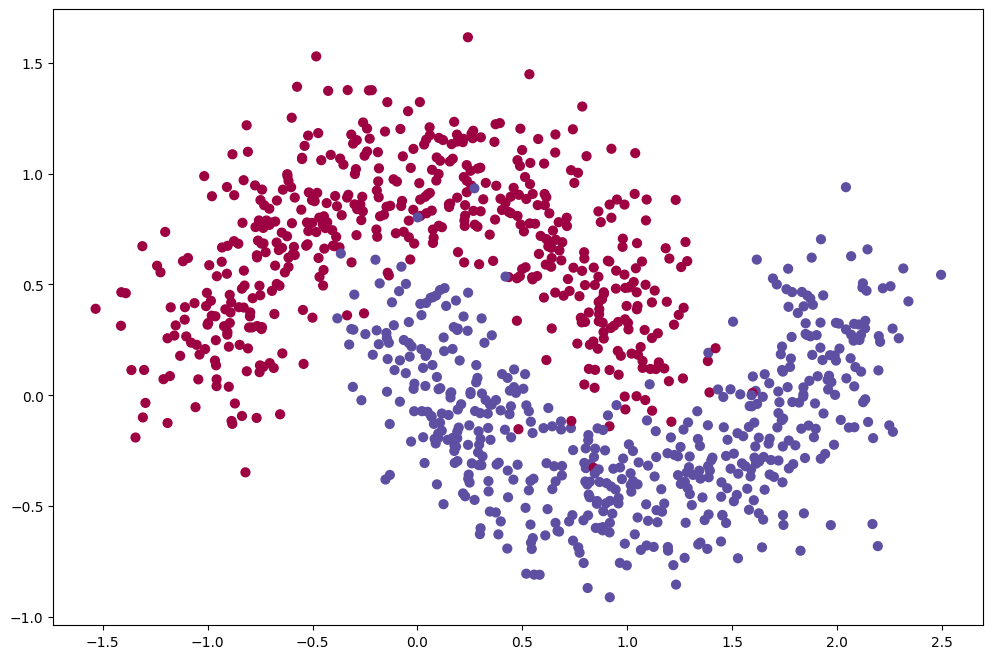

In [29]:
# Create moons dataset.

from sklearn.datasets import make_moons

x_train, y_train = make_moons(n_samples=1000, noise= 0.2, random_state=3)
plt.figure(figsize=(12, 8))
plt.scatter(x_train[:, 0], x_train[:,1], c=y_train, s=40, cmap=plt.cm.Spectral);

**Hint:** Use the next function to plt the decision boundary,

In [ ]:
pip install tensorflow

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

1/1 [==============================] - 0s 19ms/step


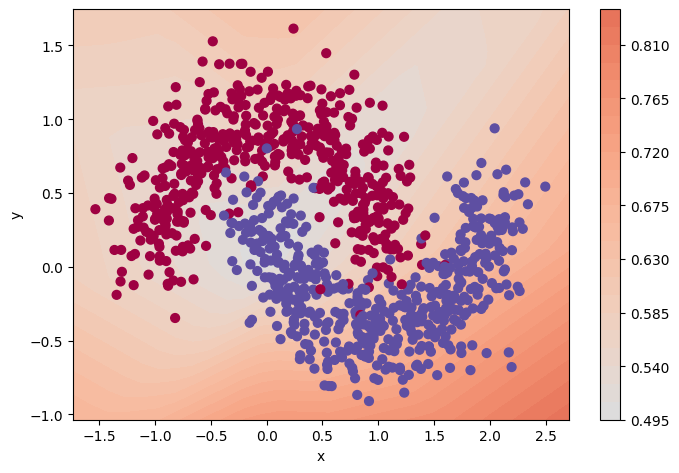

In [37]:
# creamos el dataset
x_train, y_train = make_moons(n_samples=1000, noise=0.2, random_state=3)

# Definimos y compilamos
model = Sequential()
model.add(Dense(8, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

def plot_decision_region(model, X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 30)
    y_vals = np.linspace(min_y, max_y, 30)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(model, XX[i, j], YY[i, j])
    plt.contourf(XX, YY, ZZ, 30, cmap=plt.cm.coolwarm, vmin=0, vmax=1)
    plt.colorbar()
    plt.xlabel("x")
    plt.ylabel("y")

def pred_fun(model, x1, x2):
    xval = np.array([[x1, x2]])
    return model.predict(xval)[0, 0]

plt.figure(figsize=(8, 16 / 3))
plot_decision_region(model, x_train, pred_fun)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=40, cmap=plt.cm.Spectral)
plt.show()